In [3]:
import pickle
import numpy as np
import os
import torch
from Utils import load
from Utils import generator
from Utils import metrics
from train import *
from prune import *
import torch.nn as nn
import timeit

In [4]:
def time_model(model_name,dataset, model_path):
    input_shape, num_classes = load.dimension(dataset)
    model = load.model(model_name, "lottery")(input_shape, 
                                                        num_classes, 
                                                        False, 
                                                        False)
    model_dict = model.state_dict()
    pretrained_dict = torch.load(model_path,map_location=torch.device('cpu'))
    model_dict.update(pretrained_dict)
    model.load_state_dict(model_dict)
    dataloader = load.dataloader(dataset, 256, False, 1)
    device="cpu"
    total = 0
    correct1 = 0
    correct5 = 0
    loss = nn.CrossEntropyLoss()
    _=model.eval()
    start = timeit.default_timer()
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            total += loss(output, target).item() * data.size(0)
            _, pred = output.topk(5, dim=1)
            correct = pred.eq(target.view(-1, 1).expand_as(pred))
            correct1 += correct[:,:1].sum().item()
            correct5 += correct[:,:5].sum().item()
    stop = timeit.default_timer()

    # print('Time: ', stop - start)   
    average_loss = total / len(dataloader.dataset)
    # print("avg loss: ",average_loss)
    return stop-start

In [5]:
# pruner = "mag"
# model_name = "vgg16"
# dataset = "cifar10"
# cp = "1"

# if model_name == "fc" and dataset == "mnist":
#     if pruner != "mag":
#         base_dir = "Results/data/run3/singleshot/"
#     else: 
#         base_dir = "Results/data/run4/singleshot/"
# elif model_name == "vgg16" and dataset=="cifar10":
#     if pruner != "mag":
#         base_dir = "Results/data/run1/singleshot/"
#     else: 
#         base_dir = "Results/data/run4/singleshot/"
#     if pruner == "snip":
        

# frame_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"res_frame.pkl"
# model_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"model.pt"
# prune_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"compression.pkl"
# prune_result = pickle.load(open(prune_path,"rb"))
# train_result = pickle.load(open(frame_path,"rb"))
# total_params = int((prune_result['sparsity'] * prune_result['size']).sum())
# possible_params = prune_result['size'].sum()
# total_flops = int((prune_result['sparsity'] * prune_result['flops']).sum())
# possible_flops = prune_result['flops'].sum()
# # print("Train results:\n", train_result)
# # print()
# # print(train_result["top1_accuracy"]["Final"])
# # print("Prune results:\n", prune_result)
# # print("Parameter Sparsity: {}/{} ({:.4f})".format(total_params, possible_params, total_params / possible_params))
# # print("FLOP Sparsity: {}/{} ({:.4f})".format(total_flops, possible_flops, total_flops / possible_flops))

IndentationError: expected an indented block after 'if' statement on line 16 (117898400.py, line 19)

In [101]:
def get_base_dir(pruner,model_name,dataset,cp): 
    if model_name == "fc" and dataset == "mnist":
        if pruner != "mag":
            if pruner == "snip" and cp == "0.5": 
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run3/singleshot/"
        else: 
            if cp == "0.05":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run4/singleshot/"
        
    elif model_name == "vgg16" and dataset=="cifar10":
        if pruner != "mag":
            if pruner == "snip":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run1/singleshot/"
        else: 
            base_dir = "Results/data/run4/singleshot/"
    return base_dir

In [137]:
def get_result(pruner, model_name, dataset, cp):
    if model_name == "fc" and dataset == "mnist":
        if pruner != "mag":
            if pruner == "snip" and cp == "0.5": 
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run3/singleshot/"
        else: 
            if cp == "0.05":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run4/singleshot/"
        
    elif model_name == "vgg16" and dataset=="cifar10":
        if pruner != "mag":
            if pruner == "snip":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run1/singleshot/"
        else: 
            base_dir = "Results/data/run4/singleshot/"


    frame_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"res_frame.pkl"
    model_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"model.pt"
    prune_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"compression.pkl"
    prune_result = pickle.load(open(prune_path,"rb"))
    train_result = pickle.load(open(frame_path,"rb"))
    total_params = int((prune_result['sparsity'] * prune_result['size']).sum())
    possible_params = prune_result['size'].sum()
    total_flops = int((prune_result['sparsity'] * prune_result['flops']).sum())
    possible_flops = prune_result['flops'].sum()
    # print("Train results:\n", train_result)
    # print()
    print(train_result["top1_accuracy"]["Final"])
    # print("Prune results:\n", prune_result)
    # print("Parameter Sparsity: {}/{} ({:.4f})".format(total_params, possible_params, total_params / possible_params))
    # print("FLOP Sparsity: {}/{} ({:.4f})".format(total_flops, possible_flops, total_flops / possible_flops))
    return base_dir,model_path,prune_path

In [138]:
pruner = "snip"
model_name = "vgg16"
dataset = "cifar10"
cp = "0.05"
model_path = get_result(pruner,model_name,dataset,cp)
# time = time_model(model_name,dataset,model_path)
# time

10    76.65
Name: top1_accuracy, dtype: float64


In [58]:
time = time_model(model_name,dataset,model_path)
time

In [134]:
mag_list = []
rand_list = []
grasp_list = []
synflow_list = []
snip_list = []

In [110]:
from tqdm import tqdm

In [135]:
pruner = "snip"
for cp in tqdm(["0.05","0.1","0.2","0.5","1","2"]):
    _,model_path,_ = get_result(pruner,model_name,dataset,cp)
    time = time_model(model_name,dataset,model_path)
    snip_list.append(time)
    

  0%|          | 0/6 [00:00<?, ?it/s]

10    76.65
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


 17%|█▋        | 1/6 [00:28<02:20, 28.01s/it]

10    79.62
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


 33%|███▎      | 2/6 [00:57<01:55, 28.87s/it]

10    76.05
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


 50%|█████     | 3/6 [01:27<01:28, 29.59s/it]

10    78.35
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


 67%|██████▋   | 4/6 [01:43<00:47, 23.86s/it]

10    76.25
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


 83%|████████▎ | 5/6 [02:02<00:22, 22.36s/it]

10    53.68
Name: top1_accuracy, dtype: float64
Files already downloaded and verified


100%|██████████| 6/6 [02:32<00:00, 25.46s/it]


In [136]:
snip_list

[18.615332975052297,
 15.15461639687419,
 14.046266663819551,
 13.68000764399767,
 18.28470306796953,
 16.261727385222912]

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
pruner = "synflow"
model_name = "vgg16"
dataset = "cifar10"
cp = "0.5"
pretrained_dict = torch.load(model_path,map_location=torch.device('cpu'))
_,model_path,prune_path = get_result(pruner,model_name,dataset,cp)
compression = pd.read_pickle(prune_path)
prunable = compression['prunable']==True
list(compression[prunable].module)
for i in list(compression[prunable].module):
    key = i + ".weight"
    tensor = pretrained_dict[key].view(-1)

10    79.64
Name: top1_accuracy, dtype: float64


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  2.,  0.,  1.,  1.,  1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
         1.,  1.,  2.,  1.,  3.,  0.,  2.,  3.,  0.,  2.,  2.,  1.,  2.,
         0.,  1.,  1.,  0.,  4.,  1.,  2.,  1.,  2.,  1.,  0.,  1.,  1.,
         1.,  3.,  0.,  3.,  3.,  0.,  5.,  4.,  1.,  1.,  3.,  1.,  4.,
         4.,  3.,  5.,  3.,  3.,  5.,  2.,  1.,  2.,  4.,  2.,  2.,  6.,
         3.,  6.,  2.,  3.,  3.,  3.,  6.,  7.,  6.,  6.,  3.,  8.,  7.,
         5.,  8.,  8.,  9.,  4.,  6.,  4.,  6.,  5.,  4.,  5.,  3.,  6.,
         7.,  5.,  9.,  5.,  9.,  5.,  4.,  4.,  9.

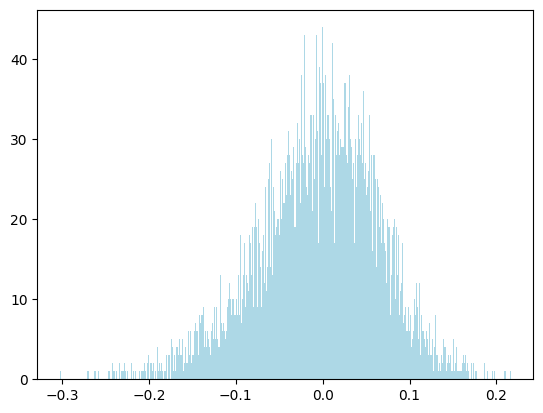

In [130]:
plt.hist(tensor,bins=500, color='lightblue')

10    79.64
Name: top1_accuracy, dtype: float64


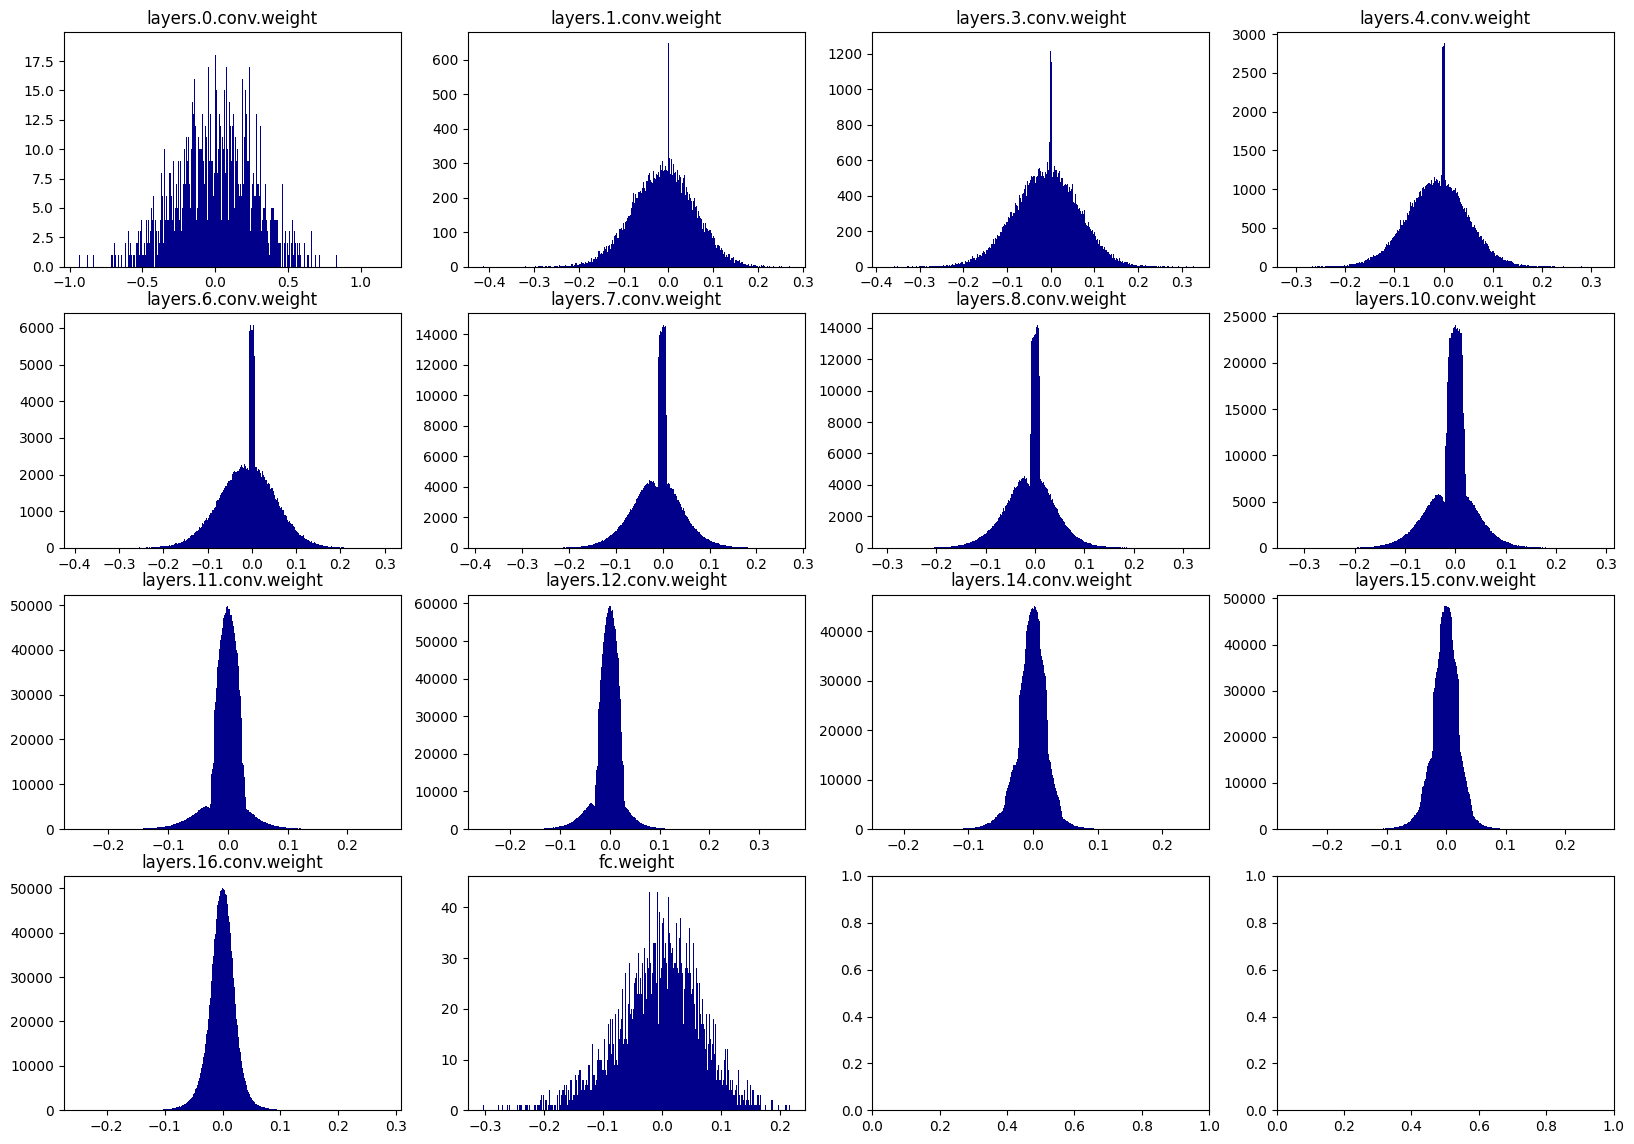

In [133]:
pruner = "synflow"
model_name = "vgg16"
dataset = "cifar10"
cp = "0.5"
_,model_path,prune_path = get_result(pruner,model_name,dataset,cp)
pretrained_dict = torch.load(model_path,map_location=torch.device('cpu'))
compression = pd.read_pickle(prune_path)
prunable = compression['prunable']==True
list(compression[prunable].module)
weight_list = []
label_list = []
for i in list(compression[prunable].module):
    key = i + ".weight"
    weight_list.append(pretrained_dict[key].view(-1))
    label_list.append(key)
fig_index = [0,0]
fig, axs = plt.subplots(4, 4, figsize=(20, 14))
for i in range(len(weight_list)):
    weight = weight_list[i]
    label = label_list[i]
    if i < 4: 
        fig_index = [0,i]
    elif i < 8:
        fig_index = [1,i%4]
    elif i < 12: 
        fig_index = [2,i%4]
    else: 
        fig_index = [3, i%4]

    ax = axs[fig_index[0],fig_index[1]]
    ax.hist(weight,bins=500,color="darkblue")
    ax.set_title(label)

KeyboardInterrupt: 

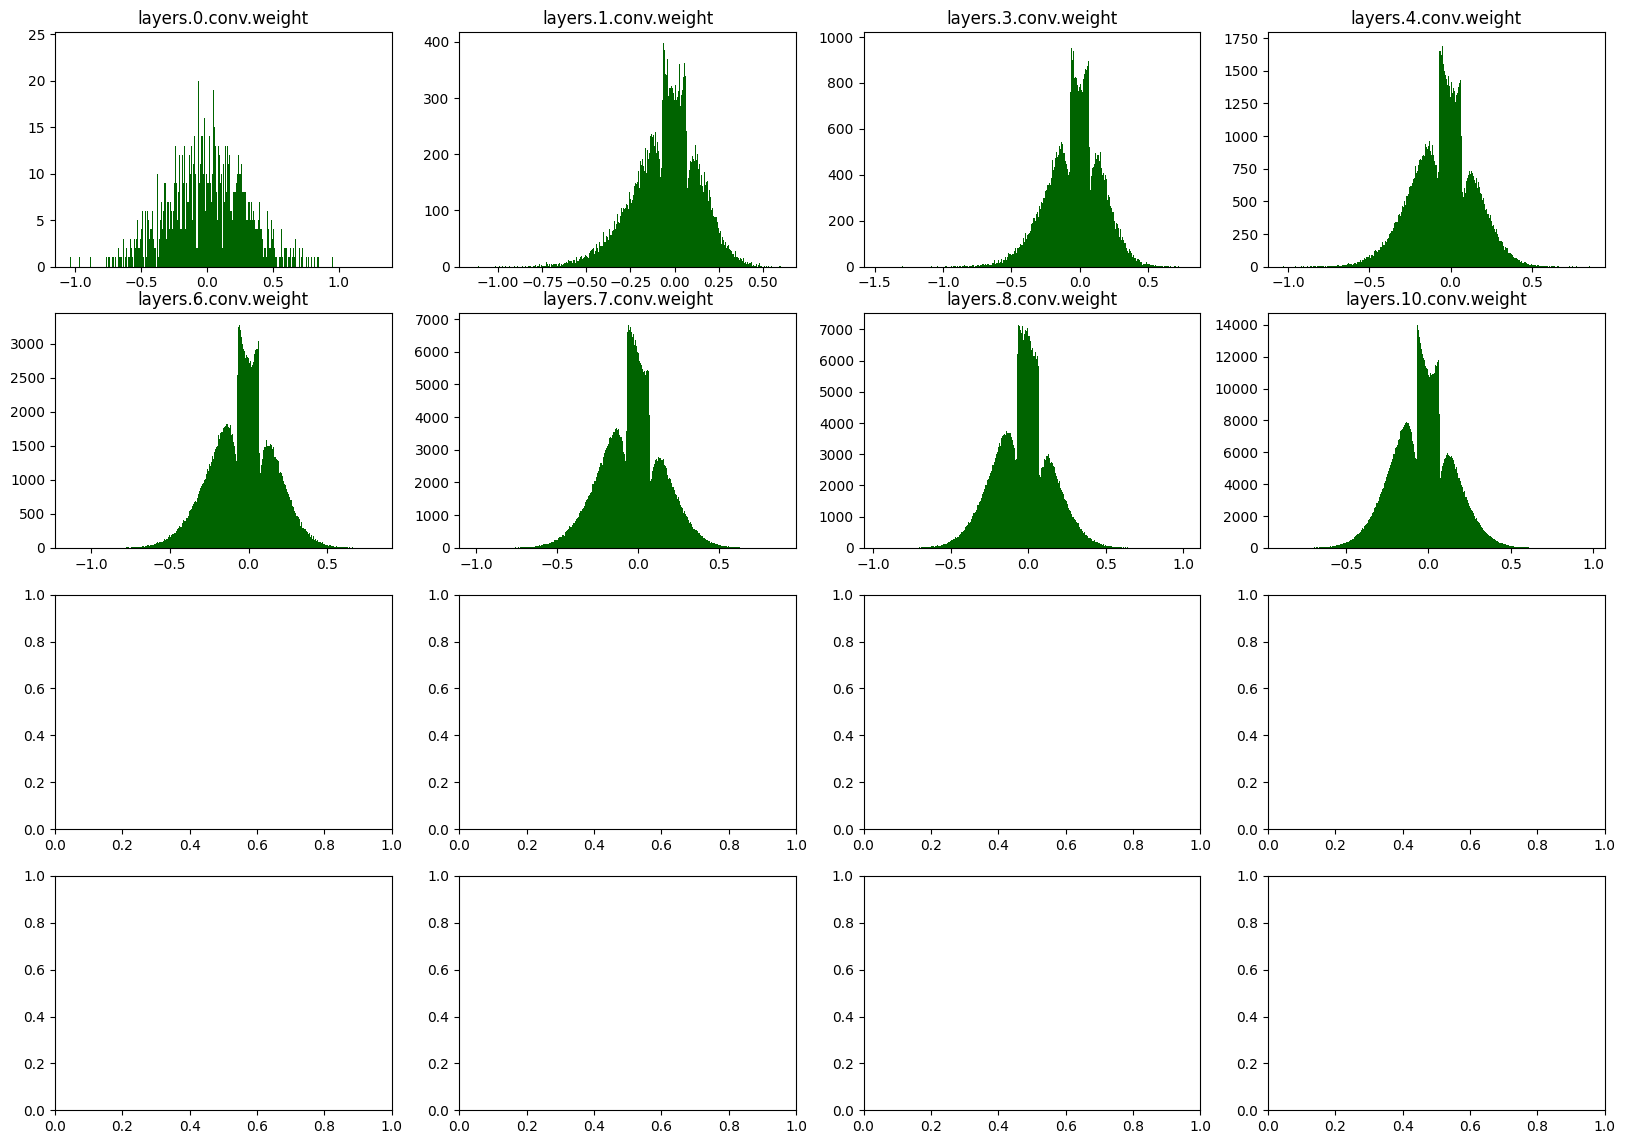

In [112]:
fig.set_title("SynFlow")

AttributeError: 'Figure' object has no attribute 'set_title'

In [156]:
def get_prune(pruner, model_name, dataset, cp):
    if model_name == "fc" and dataset == "mnist":
        if pruner != "mag":
            if pruner == "snip" and cp == "0.5": 
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run3/singleshot/"
        else: 
            if cp == "0.05":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run4/singleshot/"
        
    elif model_name == "vgg16" and dataset=="cifar10":
        if pruner != "mag":
            if pruner == "snip":
                base_dir = "Results/data/run5/singleshot/"
            else: 
                base_dir = "Results/data/run1/singleshot/"
        else: 
            base_dir = "Results/data/run4/singleshot/"


    frame_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"res_frame.pkl"
    frame = pd.read_pickle(frame_path)
    model_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"model.pt"
    prune_path = base_dir+dataset+"_"+model_name+"_"+pruner+"_"+cp+"/"+"compression.pkl"
    prune_result = pickle.load(open(prune_path,"rb"))
    train_result = pickle.load(open(frame_path,"rb"))
    total_params = int((prune_result['sparsity'] * prune_result['size']).sum())
    possible_params = prune_result['size'].sum()
    total_flops = int((prune_result['sparsity'] * prune_result['flops']).sum())
    possible_flops = prune_result['flops'].sum()
    # print("Train results:\n", train_result)
    # print()
    print(train_result["top1_accuracy"]["Final"])
    # print("Prune results:\n", prune_result)
    # print("Parameter Sparsity: {}/{} ({:.4f})".format(total_params, possible_params, total_params / possible_params))
    # print("FLOP Sparsity: {}/{} ({:.4f})".format(total_flops, possible_flops, total_flops / possible_flops))
    return prune_result

In [157]:
pruner = "synflow"
model_name = "vgg16"
dataset = "cifar10"
cp = "0.5"
prune_result=get_prune(pruner,model_name,dataset,cp)

10    79.64
Name: top1_accuracy, dtype: float64


In [158]:
prune_result

,module,param,sparsity,size,shape,flops,score mean,score variance,score sum,score abs mean,score abs variance,score abs sum,prunable
0,layers.0.conv,weight,0.997685,1728,"(64, 3, 3, 3)",1769472,1.704297e+19,inf,2.945025e+22,1.704297e+19,inf,2.945025e+22,True
1,layers.0.conv,bias,1.000000,64,"(64,)",65536,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
2,layers.1.conv,weight,0.983805,36864,"(64, 64, 3, 3)",37748736,7.988969e+17,inf,2.945054e+22,7.988969e+17,inf,2.945054e+22,True
3,layers.1.conv,bias,1.000000,64,"(64,)",65536,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
4,layers.3.conv,weight,0.969618,73728,"(128, 64, 3, 3)",18874368,3.994446e+17,inf,2.945025e+22,3.994446e+17,inf,2.945025e+22,True
5,layers.3.conv,bias,1.000000,128,"(128,)",32768,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
6,layers.4.conv,weight,0.940484,147456,"(128, 128, 3, 3)",37748736,1.997163e+17,inf,2.944937e+22,1.997163e+17,inf,2.944937e+22,True
7,layers.4.conv,bias,1.000000,128,"(128,)",32768,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
8,layers.6.conv,weight,0.881927,294912,"(256, 128, 3, 3)",18874368,9.985868e+16,inf,2.944952e+22,9.985868e+16,inf,2.944952e+22,True
9,layers.6.conv,bias,1.000000,256,"(256,)",16384,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,False
